# Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term(also called 'intercept')

- Equation for Linear Regression Model Prediction

$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2+....+ \theta_nx_n$$

where,
- ŷ :  the predicted value.
- n :  the number of features.
- xi :  the ith feature value.
- θj :  the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).


Vecotrized for the above equation:

$$\hat{y} = h_{\theta}(x) = \theta.X$$

where, 

- $\theta$: Parameter vector
- X : feature Vector

The most common performance measure of a regression model is the <i> Mean Square Error(RMSE)<i>. To train a Model, we need to find the value of $\theta$, so that the RMSE is minimized.
    
$$MSE = (\frac{1}{m}\sum_{i=1}^{m}\theta^{T}x^{(i)} - y^{i})^{2}$$
    
$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{i})^{2}}$$
    

### Linear Regression using The Normal Equation
To find the value of θ that minimizes the cost function, there is a closed-form solution
—in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation

$$ \hat{\theta} = (X^TX)^{-1} X^T y$$

where,
- $\hat{\theta}$: Parameters values that minimizes the cost function
- y : the vector of target values

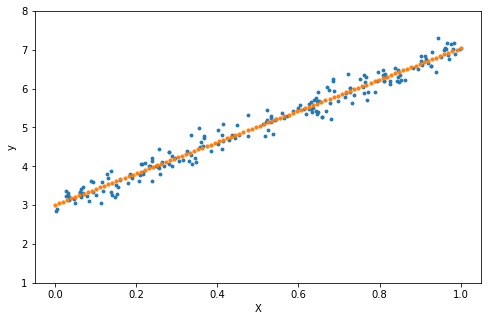

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples=100):
    """Generates one dimensionl data for n_samples"""
    X = np.random.rand(n_samples, 1)
    b = np.ones((n_samples, 1))
    X_b = np.c_[b, X]
    gaussian_noise = np.random.randn(n_samples, 1)/5
    y = 3 + 4*X + gaussian_noise
    return X, X_b, y

X, X_b, y = generate_data(200)

# plot generated data
fig, ax = plt.subplots(figsize=(8, 5))
_ = ax.scatter(X_b[:,1], y.ravel(), s=8)
_ = ax.set(ylabel='y', xlabel='X',ylim=[1, 8])

theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# make prediction using 'theta_hat'
x = np.linspace(0, 1, 100)[:, np.newaxis]
x_b = np.c_[np.ones((100,1)), x]
y_pred = x_b.dot(theta_hat)

# plot predicted data
_ = ax.scatter(x_b[:,1], y_pred.ravel(), s=10)


Same result can be achieved using Scikit-Learn 

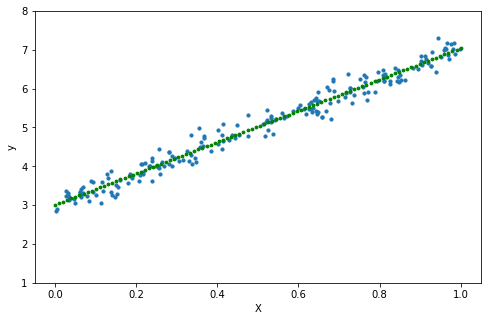

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

x = np.linspace(0, 1, 100)[:, np.newaxis]

y_pred = lin_reg.predict(x)

fig, ax = plt.subplots(figsize=(8, 5))
_ = ax.scatter(X, y.ravel(), s=10)
_ = ax.set(ylabel='y', xlabel='X',ylim=[1, 8])
_ = ax.scatter(x, y_pred.ravel(), s=8, c='g')

In [3]:
# Attributes of the regressors

print(lin_reg.coef_)
print(lin_reg.intercept_)


[[4.03423273]]
[3.00972556]


### Linear Regression using Gradient Descent

Gradient Descent is a generic optimization algorithm. The idea of Gradient Descent is to tweek parameters iteratively in order to minimize a cost function. 

At first, parameter vector $\theta$ is randomly iniatialized. Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum. 

An important hyperparameter in Gradient Descent is <i>learning rate</i>. If it is too high, you may jump across the minimum and end up on the other side never reaching the minimum. You may also jump up higher making the algorithm diverge. But on the other hand, if learning rate is too low, it may take too many iteratives(time) to converge to the minimum.

#### Batch Gradient Descent
Batch Gradient Descent uses the whole training set to compute the gradient at every step.

$$\frac{\partial MSE(\theta)}{\partial \theta_j} = \frac{2}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)} - y^{i})x_j^{(i)}$$

The equation above gives a gradient vector $\Delta_{\theta}MSE(\theta)$. In each iteration of paramter optimization process, new gradient vector is computed and subtracted from the parameter vector.

$$\theta^{(next_iteration)} = \theta - \eta \Delta_{\theta}MSE(\theta)$$
where, $\eta$ is the size of step (learning rate)


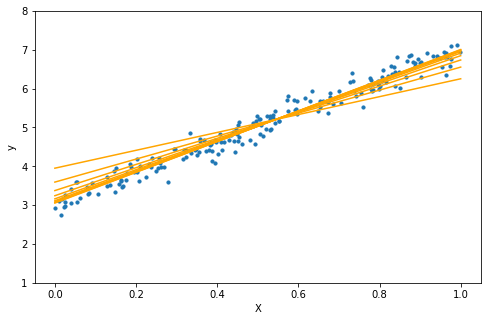

In [40]:
# Implementation of Batch Gradient Descent Algorithm

import numpy as np
import matplotlib.pyplot as plt

# Data generation for training
def generate_data(n_samples=100):
    """Generates one dimensionl data for n_samples"""
    X = np.random.rand(n_samples, 1)
    b = np.ones((n_samples, 1))
    X_b = np.c_[b, X]
    gaussian_noise = np.random.randn(n_samples, 1)/5
    y = 3 + 4*X + gaussian_noise
    return X, X_b, y
X, X_b, y = generate_data(200)

# store parameter in each epoch
theta_path_bgd = []

# hyperparameters
eta =0.01  # Learning rate
n_iterations =2000
m = 100    # number of samples

# randomly initalize the theta (two dimensional)
theta = np.random.randn(2,1)

# data for prediction
x = np.linspace(0, 1, m)[:, np.newaxis]
x_b = np.c_[np.ones((100,1)), x]
_ = ax.set(ylabel='y', xlabel='X',ylim=[1, 8])

# plotting
fig, ax = plt.subplots(figsize=(8, 5))
_ = ax.scatter(X, y.ravel(), s=10)

_ = ax.set(ylabel='y', xlabel='X',ylim=[1, 8])
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)
    if iteration%200 == 0:
        y_pred = x_b.dot(theta)
        _ = ax.plot(x_b[:,1], y_pred.ravel(), c='orange')

#### Stochastic Gradient Descent
it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a
random instance in the training set at every step and computes the gradients based only on that single instance.

Due to the stochastic nature , this algorithm is much less regular than Batch Gradient Descent because instead of gently decreasing until it reaches the minimum, the cost fucntion will bounce up and down.Over time it will end up very close to the minimum.

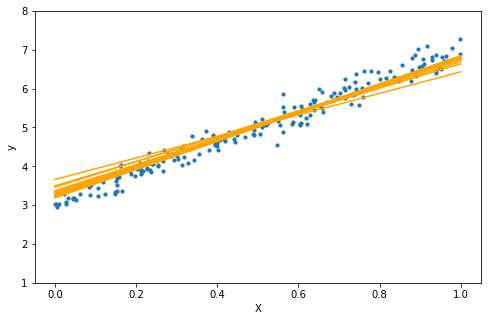

In [81]:
# implementation of SGD using a simple learning schedule

import numpy as np
import matplotlib.pyplot as plt

# Data generation for training
def generate_data(n_samples=100):
    """Generates one dimensionl data for n_samples"""
    X = np.random.rand(n_samples, 1)
    b = np.ones((n_samples, 1))
    X_b = np.c_[b, X]
    gaussian_noise = np.random.randn(n_samples, 1)/5
    y = 3 + 4*X + gaussian_noise
    return X, X_b, y
X, X_b, y = generate_data(200)

# paramters
theta = np.random.randn(2,1)

# store parameter in each epoch
theta_path_sgd = []

# hyperparameters
eta =0.1  # Learning rate
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0 / (t + t1)


# data for prediction
x = np.linspace(0, 1, m)[:, np.newaxis]
x_b = np.c_[np.ones((100,1)), x]   # 100 samples

# plotting
fig, ax = plt.subplots(figsize=(8, 5))
_ = ax.scatter(X, y.ravel(), s=10)
_ = ax.set(ylabel='y', xlabel='X',ylim=[1, 8])

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(100)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        if epoch < 20 and i==0:
            y_pred = x_b.dot(theta)
            _ = ax.plot(x_b[:,1], y_pred.ravel(), c='orange')

#### Mini-Batch Gradient Descent
Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch G computes the gradients on small random sets of instances called mini-batches.

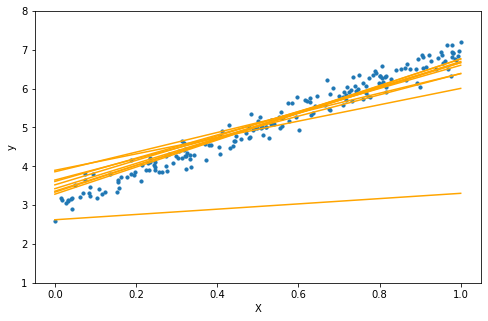

In [83]:
# implementation of Mini-Batch Gradient Descent using a simple learning schedule

import numpy as np
import matplotlib.pyplot as plt

# Data generation for training
def generate_data(n_samples=100):
    """Generates one dimensionl data for n_samples"""
    X = np.random.rand(n_samples, 1)
    b = np.ones((n_samples, 1))
    X_b = np.c_[b, X]
    gaussian_noise = np.random.randn(n_samples, 1)/5
    y = 3 + 4*X + gaussian_noise
    return X, X_b, y
X, X_b, y = generate_data(200)

# paramters
theta = np.random.randn(2,1)

# store parameter in each epoch
theta_path_mgd = []

# hyperparameters
eta =0.1  # Learning rate
n_epochs = 50
t0, t1 = 200, 1000
m = 100
minibatch_size = 10

def learning_schedule(t):
    return t0 / (t + t1)

# data for prediction
x = np.linspace(0, 1, m)[:, np.newaxis]
x_b = np.c_[np.ones((100,1)), x]   # 100 samples

# plotting
fig, ax = plt.subplots(figsize=(8, 5))
_ = ax.scatter(X, y.ravel(), s=10)
_ = ax.set(ylabel='y', xlabel='X',ylim=[1, 8])

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        if (epoch%50==0 or epoch < 10) and i==0:
            y_pred = x_b.dot(theta)
            _ = ax.plot(x_b[:,1], y_pred.ravel(), c='orange')

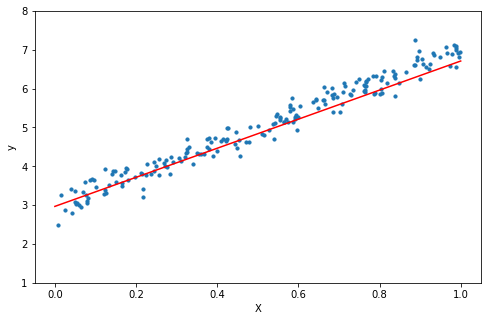

In [49]:
## Stochastic Gradient Descent using Scikit-Learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Data generation for training
def generate_data(n_samples=100):
    """Generates one dimensionl data for n_samples"""
    X = np.random.rand(n_samples, 1)
    gaussian_noise = np.random.randn(n_samples, 1)/5
    y = 3 + 4*X + gaussian_noise
    return X, y
X, y = generate_data(200)

sgd_reg = SGDRegressor(max_iter=1000,
                      eta0=0.1,
                      alpha = 0.0001,
                      learning_rate='optimal')
sgd_reg.fit(X, y.ravel())

# data for prediction
x = np.linspace(0, 1, m)[:, np.newaxis]
y_pred = sgd_reg.predict(x)

# plotting
fig, ax = plt.subplots(figsize=(8, 5))
_ = ax.scatter(X, y.ravel(), s=10)
_ = ax.plot(x, y_pred, c='r')
_ = ax.set(ylabel='y', xlabel='X',ylim=[1, 8])

#### Gradient Descent path in parameter space

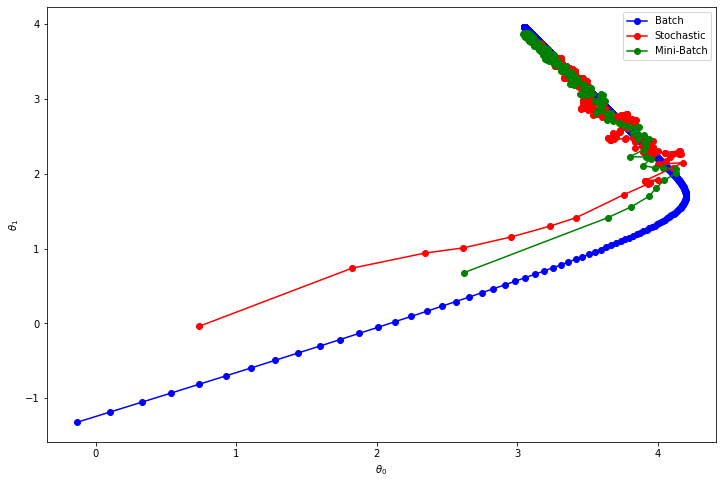

In [87]:
import matplotlib.pyplot as plt

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

fig, ax = plt.subplots(figsize=(12,8))
_ = ax.plot(theta_path_bgd[:,0], theta_path_bgd[:,1],'b-o', label='Batch')
_ = ax.plot(theta_path_sgd[:,0], theta_path_sgd[:,1],'r-o', label='Stochastic')
_ = ax.plot(theta_path_mgd[:,0], theta_path_mgd[:,1],'g-o', label='Mini-Batch')
_ = ax.set(xlabel=r'$\theta_0$', ylabel=r'$\theta_1$')
_ = ax.legend()